In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predictive-analytics-for-customer-churn-dataset/data_descriptions.csv
/kaggle/input/predictive-analytics-for-customer-churn-dataset/train.csv
/kaggle/input/predictive-analytics-for-customer-churn-dataset/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/predictive-analytics-for-customer-churn-dataset/train.csv')
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [3]:
df['Churn'].value_counts()

Churn
0    199605
1     44182
Name: count, dtype: int64

In [4]:
df.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'CustomerID', 'Churn'],
      dtype='object')

In [5]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [6]:
# Check for null values
print(df.isnull().sum())

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64


In [7]:
# Check data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [8]:
# Drop 'CustomerID' column
df.drop(['CustomerID'], axis=1, inplace=True)

# Confirm the change
print(df.columns)


Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'Churn'],
      dtype='object')


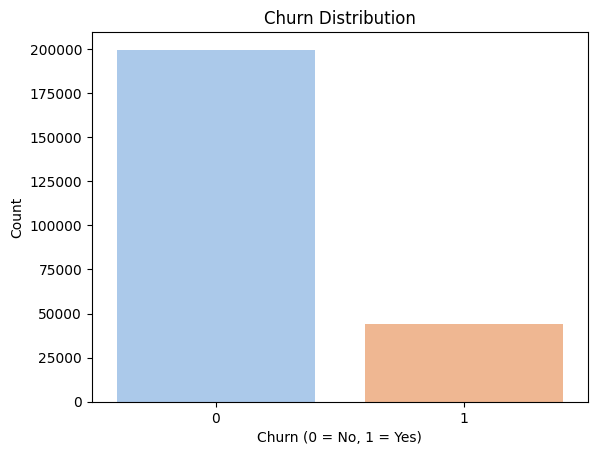

Churn Percentage:
 Churn
0    81.876802
1    18.123198
Name: proportion, dtype: float64


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of the target variable
sns.countplot(x='Churn', data=df, palette='pastel')
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Percentage of each class
churn_percent = df['Churn'].value_counts(normalize=True) * 100
print("Churn Percentage:\n", churn_percent)


In [10]:
df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


In [11]:
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,63.531377,10,Sci-Fi,2.176498,4,Male,3,No,No,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,25.725595,18,Action,3.478632,8,Male,23,No,Yes,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,57.364061,23,Fantasy,4.238824,6,Male,1,Yes,Yes,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,131.537507,30,Drama,4.276013,2,Male,24,Yes,Yes,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,45.356653,20,Comedy,3.616170,4,Female,0,No,No,0


In [12]:
df.shape

(243787, 20)

In [13]:
print(df.duplicated().sum())  # Check for duplicates


0


In [14]:
# Separating target variable
target = df['Churn']

# Identifying numerical and categorical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove target variable from features lists (if applicable)
if 'Churn' in numerical_features:
    numerical_features.remove('Churn')
if 'Churn' in categorical_features:
    categorical_features.remove('Churn')

# Display results
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)
print("Target Variable:", target.name)


Numerical Features: ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth', 'WatchlistSize']
Categorical Features: ['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled']
Target Variable: Churn


In [15]:
if 'CustomerID' in categorical_features:
    categorical_features.remove('CustomerID')


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


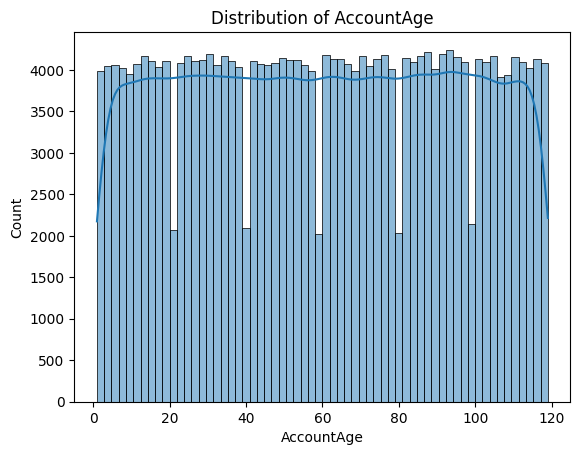

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


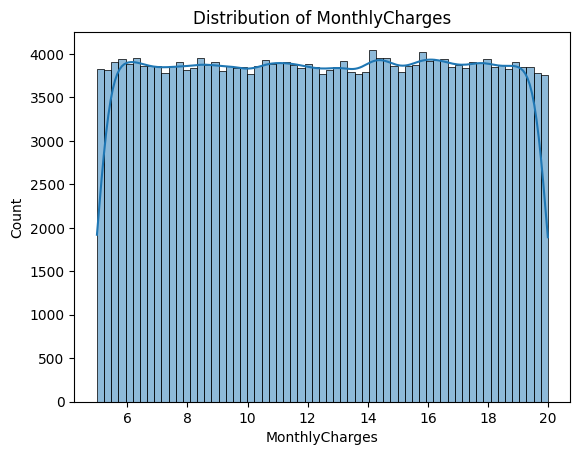

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


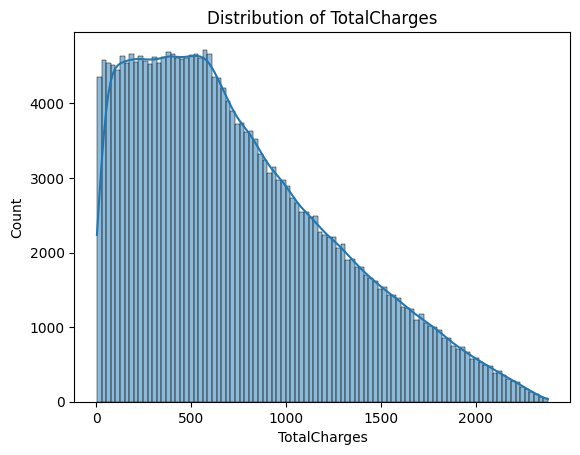

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


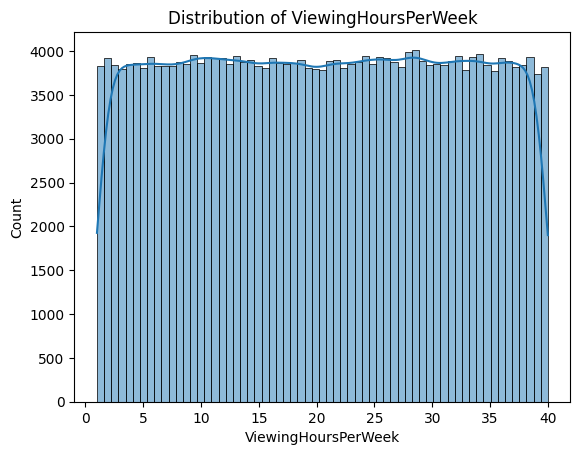

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


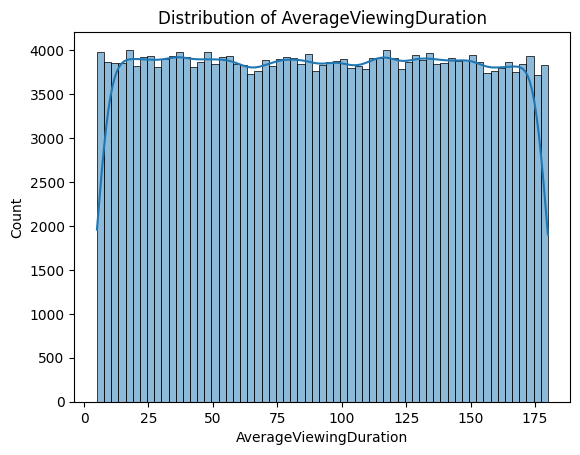

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


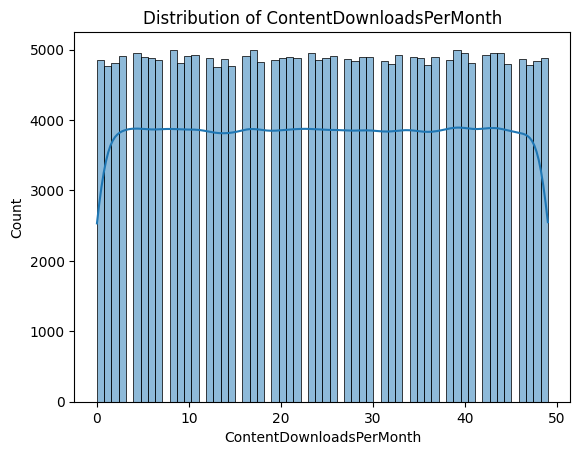

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


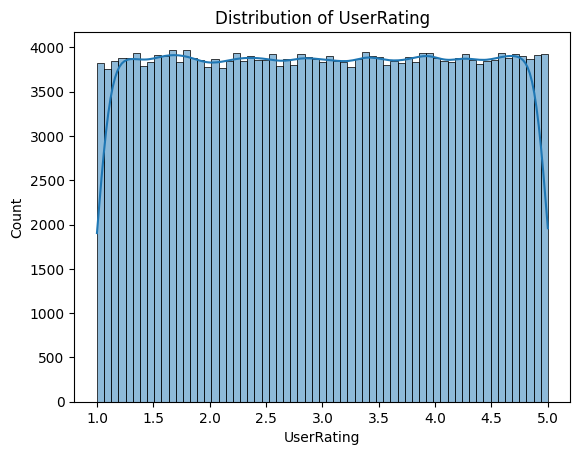

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


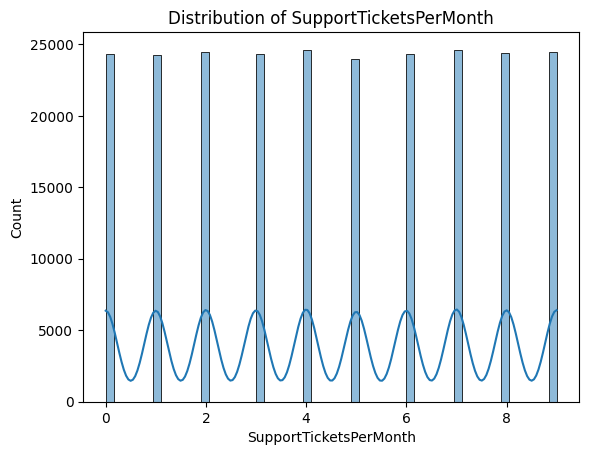

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


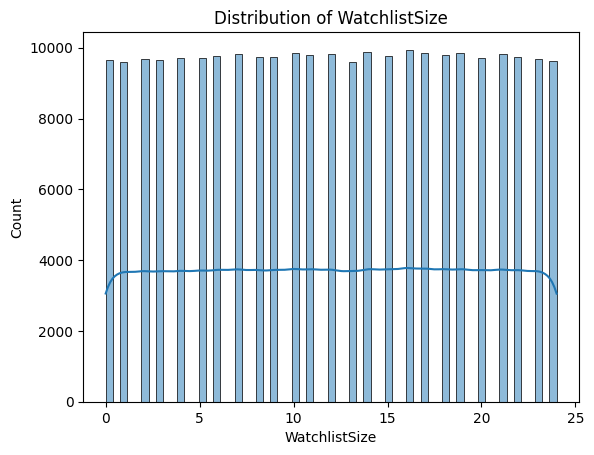

In [16]:
for feature in numerical_features:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

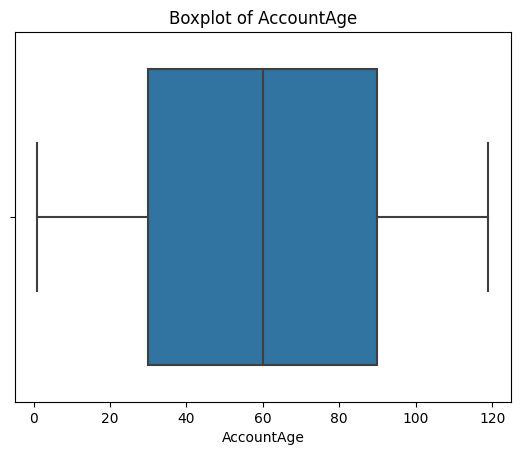

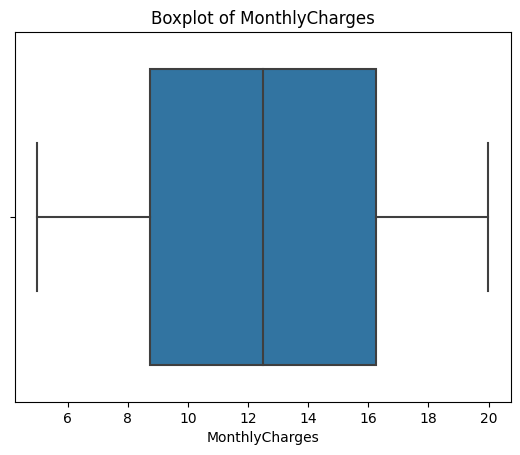

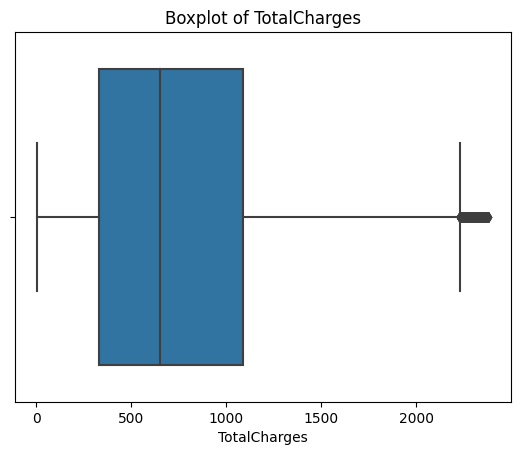

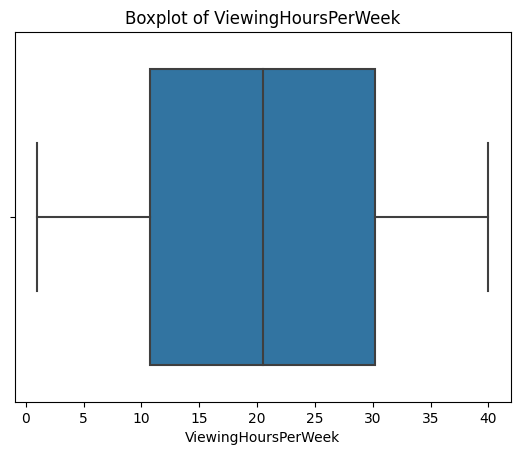

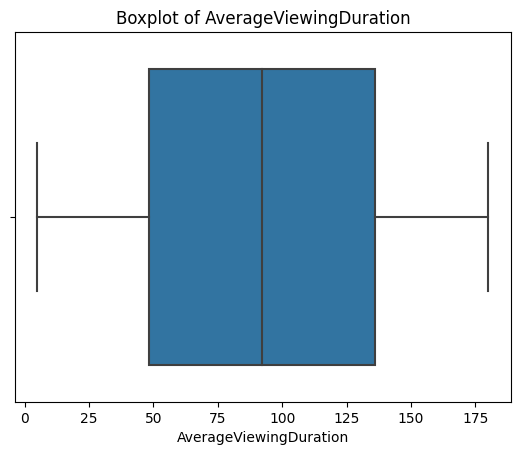

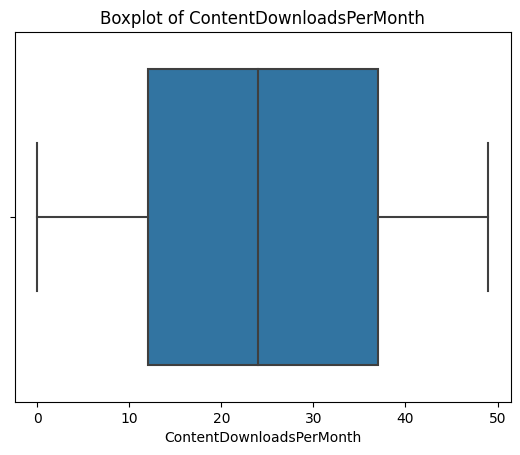

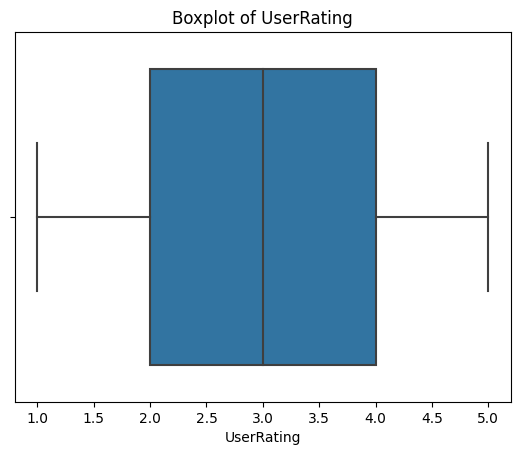

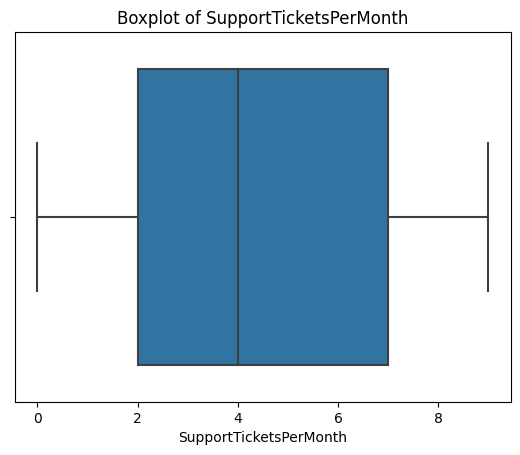

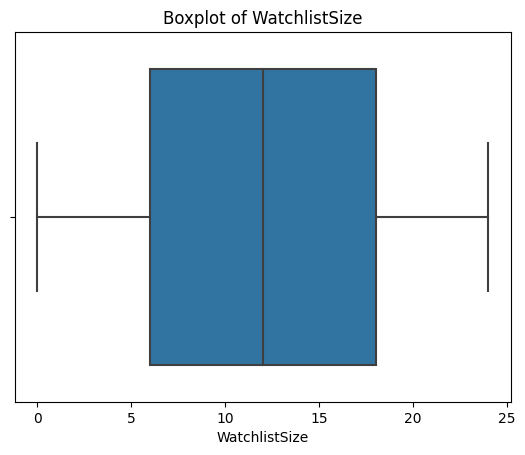

In [17]:
for feature in numerical_features:
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


Churn                       1.000000
MonthlyCharges              0.100473
SupportTicketsPerMonth      0.084064
UserRating                  0.022124
WatchlistSize               0.021739
TotalCharges               -0.120529
ViewingHoursPerWeek        -0.128645
ContentDownloadsPerMonth   -0.129752
AverageViewingDuration     -0.146897
AccountAge                 -0.197736
Name: Churn, dtype: float64


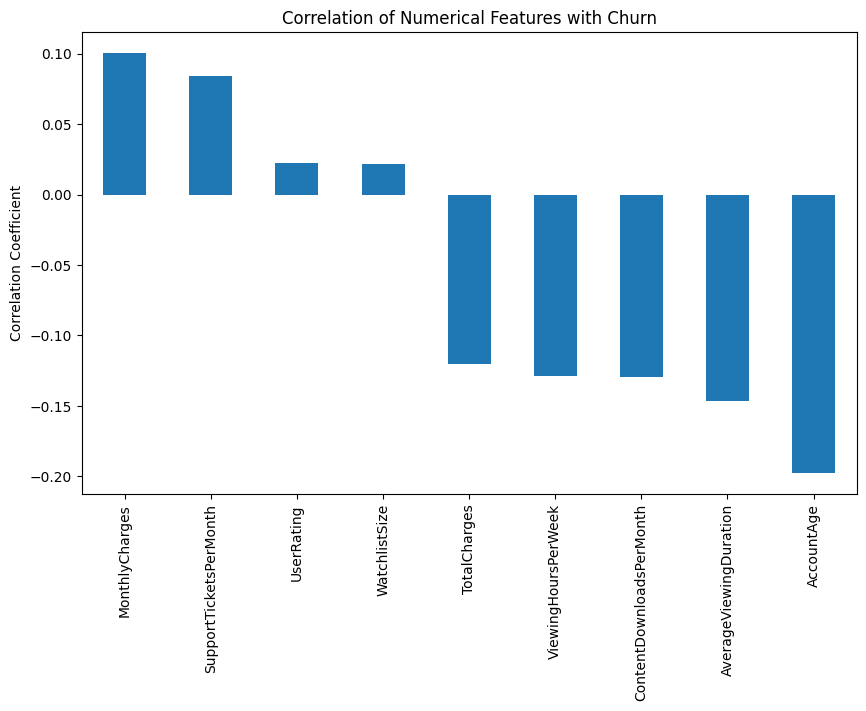

In [18]:
# Calculate correlation matrix
correlation_matrix = df[numerical_features + ['Churn']].corr()

# Extract correlations with the target variable ('Churn')
correlation_with_target = correlation_matrix['Churn'].sort_values(ascending=False)

# Display correlation with Churn
print(correlation_with_target)

# Visualize correlations with a bar plot
correlation_with_target.drop('Churn').plot(kind='bar', figsize=(10, 6))
plt.title('Correlation of Numerical Features with Churn')
plt.ylabel('Correlation Coefficient')
plt.show()

# Most Influential Features

- **AccountAge (-0.198)**: Longer-tenured customers are more stable. This feature negatively correlates with churn, suggesting that customers with more experience or longevity are less likely to leave.
- **AverageViewingDuration (-0.147)**: Engagement reduces churn. Users who spend more time viewing content are less likely to churn, which implies that user activity can be a strong predictor of retention.
- **ContentDownloadsPerMonth (-0.130)**: Active users are less likely to churn. Higher download activity typically indicates a more engaged and satisfied user base.

# Weak Positive Influences

- **MonthlyCharges (0.100)**: Higher charges slightly increase churn. While the correlation is weak, it suggests that users who pay higher charges may be more likely to churn, possibly due to dissatisfaction or better alternatives.
- **SupportTicketsPerMonth (0.084)**: Frequent support tickets suggest dissatisfaction. A higher number of support requests correlates weakly with churn, indicating that users experiencing issues may eventually leave.

# Less Relevant Features

- **UserRating and WatchlistSize**: These features have near-zero correlation with churn, meaning they might not add much predictive power on their own. Therefore, they are less relevant in churn prediction models.


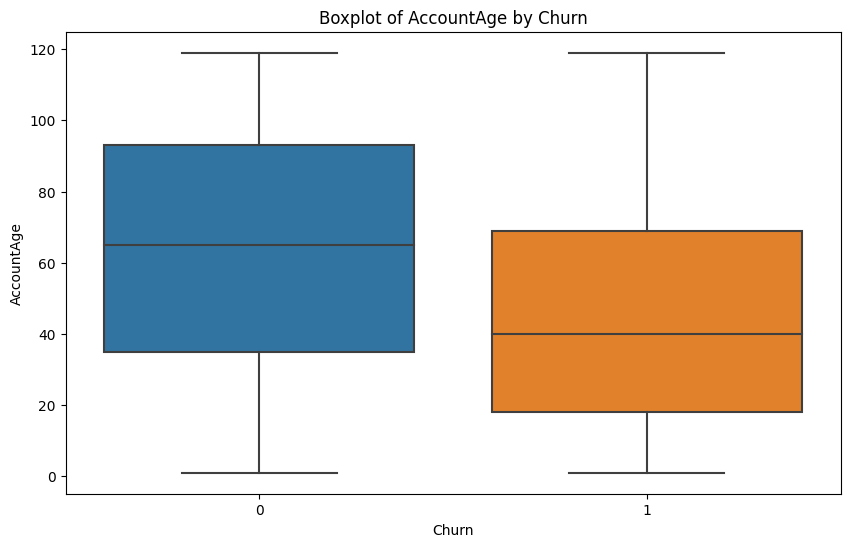

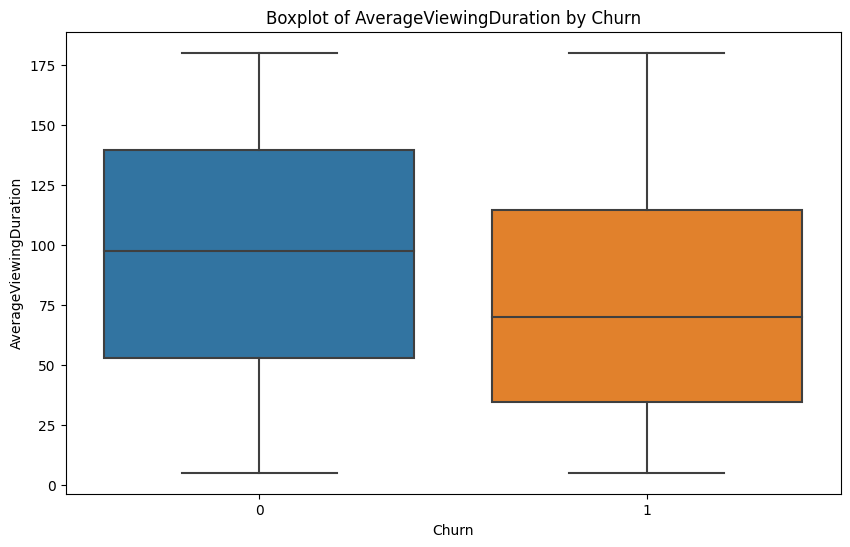

In [19]:

# Boxplot for AccountAge by Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='AccountAge', data=df)
plt.title('Boxplot of AccountAge by Churn')
plt.show()

# Boxplot for AverageViewingDuration by Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='AverageViewingDuration', data=df)
plt.title('Boxplot of AverageViewingDuration by Churn')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


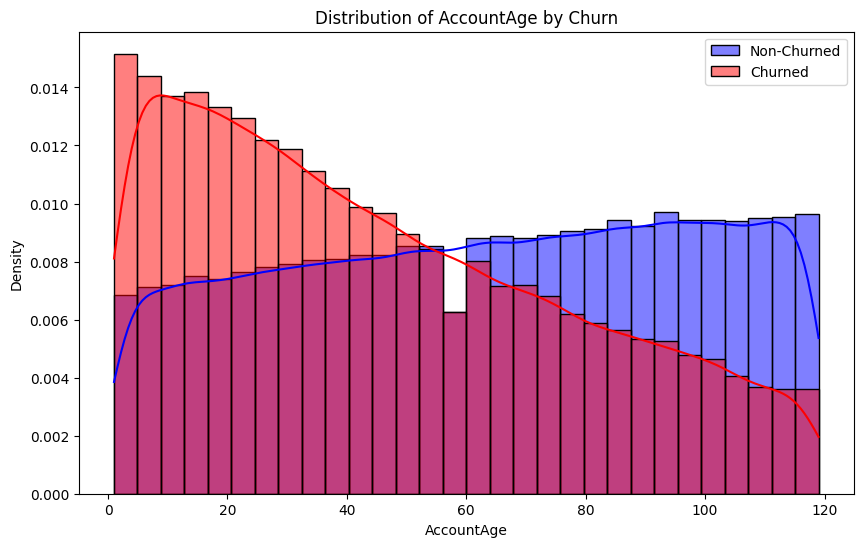

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


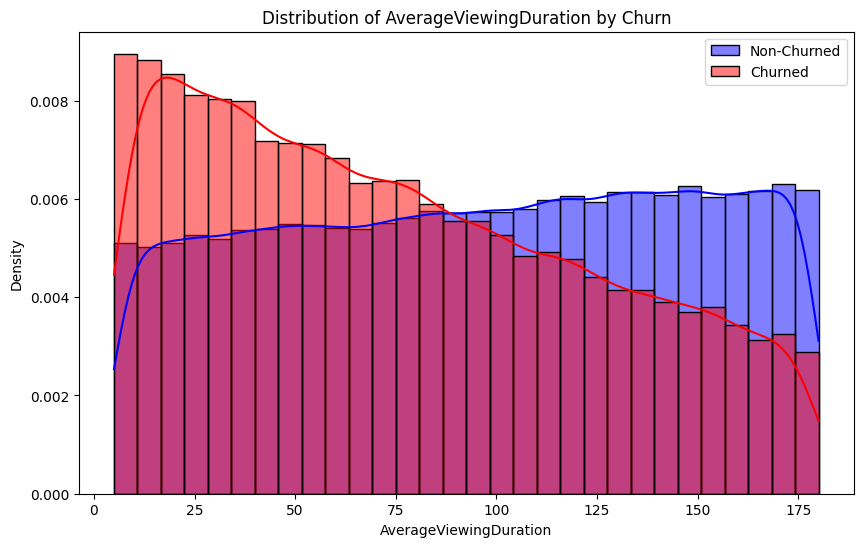

In [20]:
# Histogram for AccountAge by Churn
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Churn'] == 0]['AccountAge'], color='blue', kde=True, label='Non-Churned', stat='density', bins=30)
sns.histplot(df[df['Churn'] == 1]['AccountAge'], color='red', kde=True, label='Churned', stat='density', bins=30)
plt.title('Distribution of AccountAge by Churn')
plt.legend()
plt.show()

# Histogram for AverageViewingDuration by Churn
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Churn'] == 0]['AverageViewingDuration'], color='blue', kde=True, label='Non-Churned', stat='density', bins=30)
sns.histplot(df[df['Churn'] == 1]['AverageViewingDuration'], color='red', kde=True, label='Churned', stat='density', bins=30)
plt.title('Distribution of AverageViewingDuration by Churn')
plt.legend()
plt.show()


Looking at these, clearly AccountAge and AverageViewingDuration are two features which has impact to Churn.

In [21]:
df.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'Churn'],
      dtype='object')

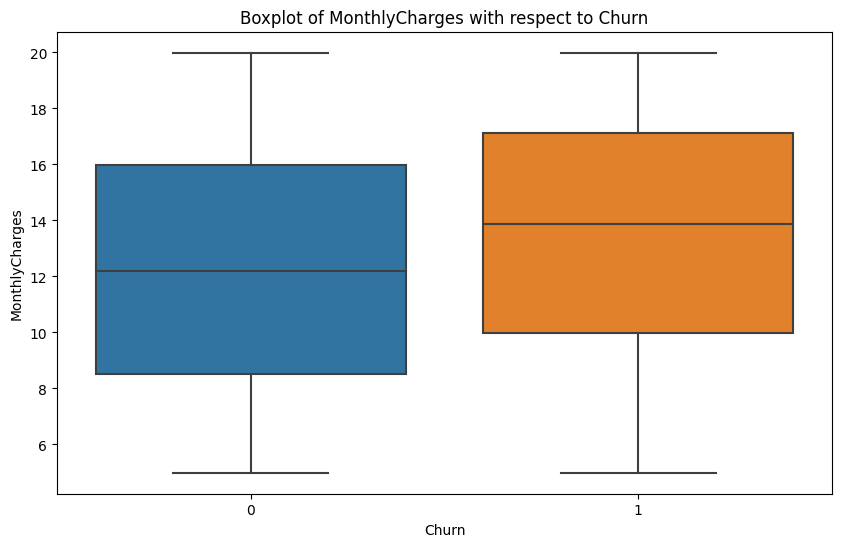

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


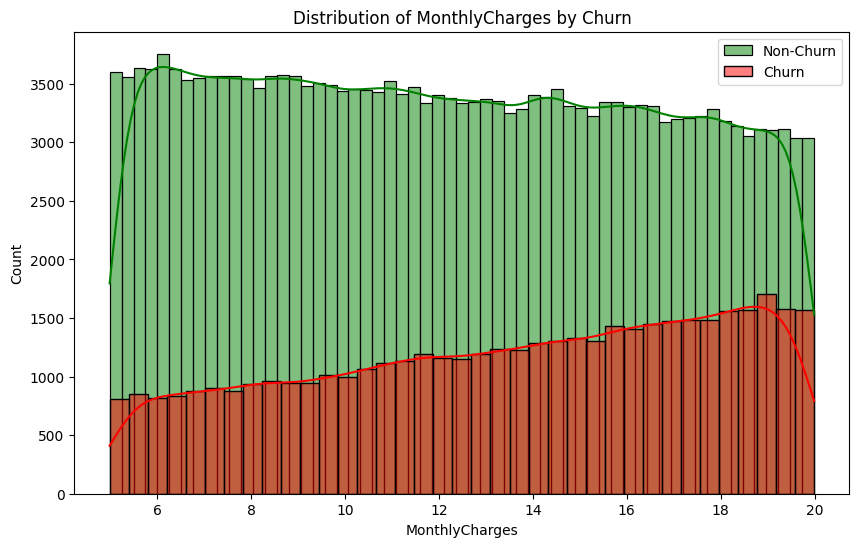

Descriptive stats for MonthlyCharges:
          count       mean       std       min       25%        50%  \
Churn                                                                 
0      199605.0  12.286129  4.317675  4.990062  8.532456  12.189954   
1       44182.0  13.414880  4.251322  4.990112  9.963733  13.855745   

             75%        max  
Churn                        
0      15.993218  19.989957  
1      17.132808  19.989741  




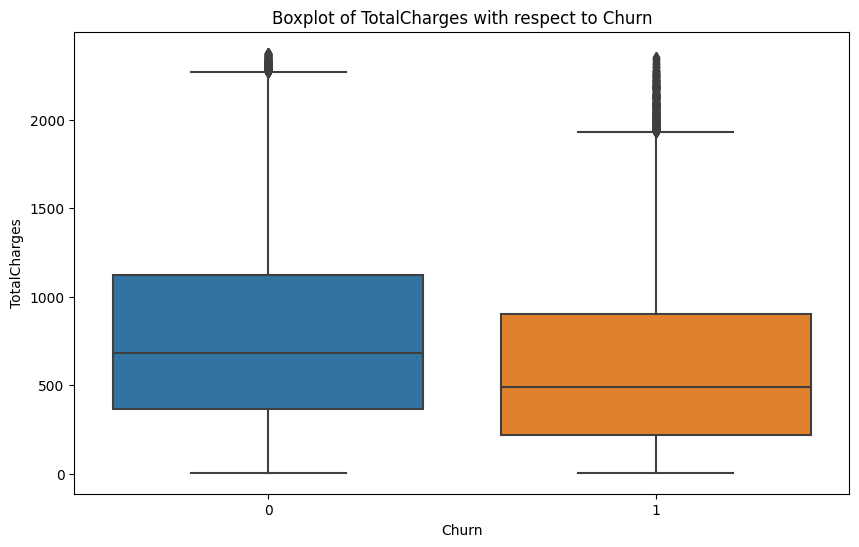

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


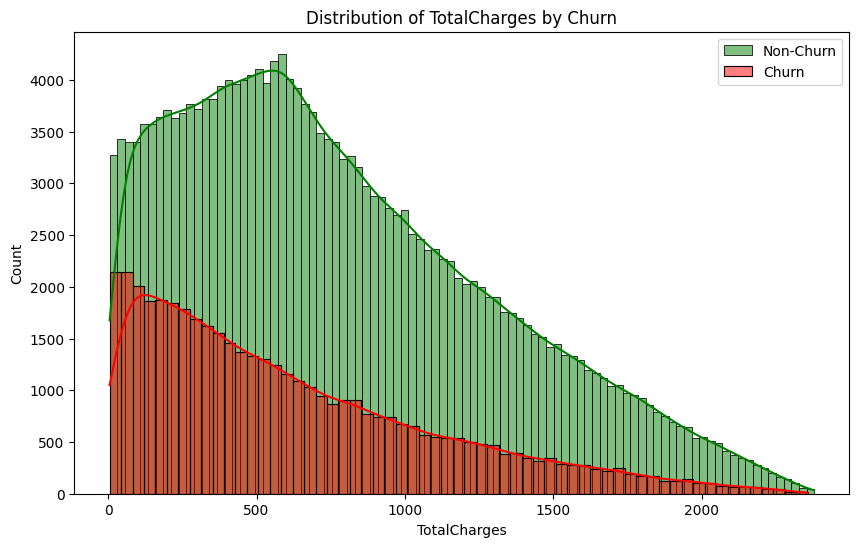

Descriptive stats for TotalCharges:
          count        mean         std       min         25%         50%  \
Churn                                                                       
0      199605.0  780.402245  524.200292  4.999861  362.799813  684.445761   
1       44182.0  616.737816  496.333924  4.991154  218.502198  488.927265   

               75%          max  
Churn                            
0      1124.699587  2378.723844  
1       903.552235  2356.614662  




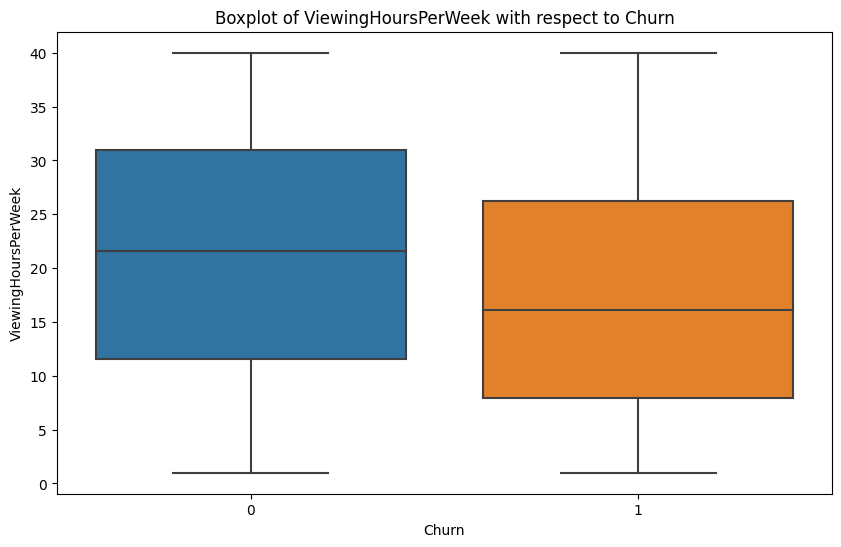

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


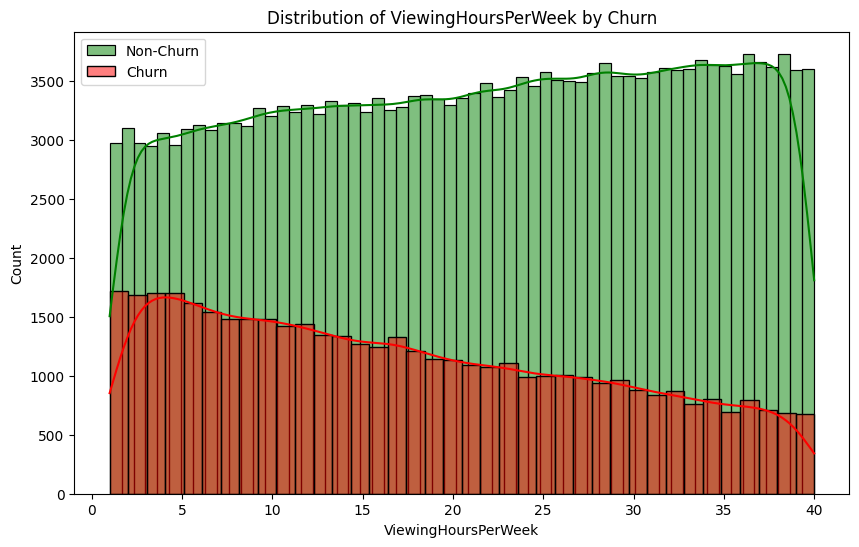

Descriptive stats for ViewingHoursPerWeek:
          count       mean        std       min        25%        50%  \
Churn                                                                   
0      199605.0  21.182697  11.198072  1.000133  11.601957  21.545178   
1       44182.0  17.427741  10.932147  1.000065   7.898715  16.079108   

             75%        max  
Churn                        
0      30.931229  39.999723  
1      26.218169  39.997750  




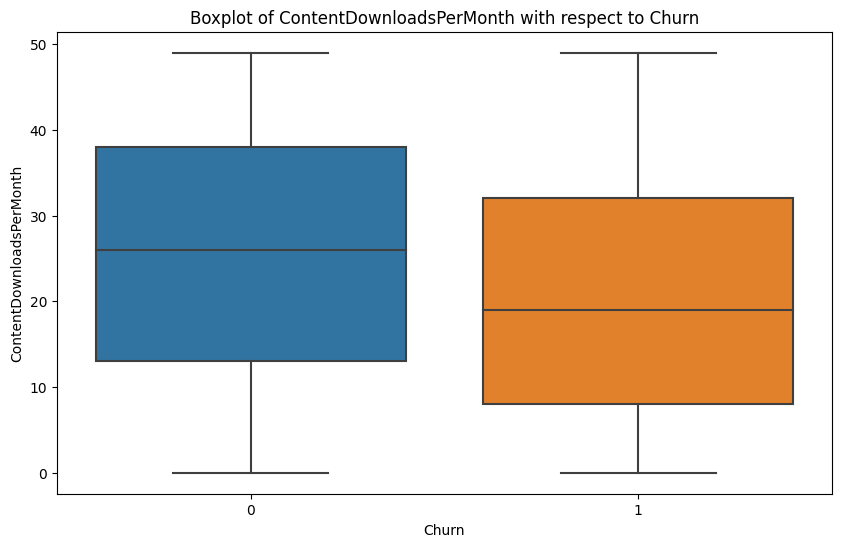

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


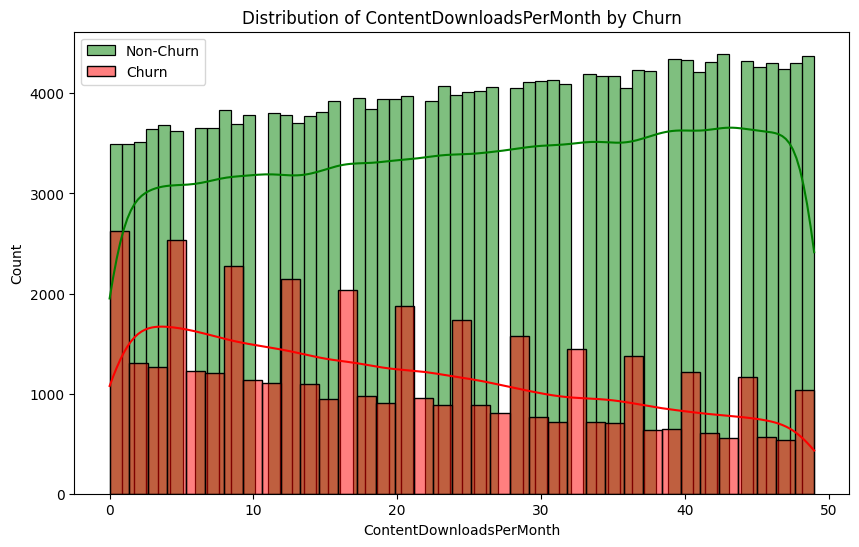

Descriptive stats for ContentDownloadsPerMonth:
          count       mean        std  min   25%   50%   75%   max
Churn                                                             
0      199605.0  25.383853  14.358435  0.0  13.0  26.0  38.0  49.0
1       44182.0  20.526323  14.028993  0.0   8.0  19.0  32.0  49.0




In [22]:
# Create a list of the features you want to inspect
features = ['MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'ContentDownloadsPerMonth']

# Loop through each feature to visualize with respect to Churn
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn', y=feature, data=df)  # Boxplot for each feature
    plt.title(f'Boxplot of {feature} with respect to Churn')
    plt.show()

    # Histogram to show the distribution of each feature by Churn
    plt.figure(figsize=(10, 6))
    sns.histplot(df[df['Churn'] == 0][feature], color='green', kde=True, label='Non-Churn')
    sns.histplot(df[df['Churn'] == 1][feature], color='red', kde=True, label='Churn')
    plt.title(f'Distribution of {feature} by Churn')
    plt.legend()
    plt.show()

    # Print basic descriptive statistics by Churn
    print(f"Descriptive stats for {feature}:")
    print(df.groupby('Churn')[feature].describe())
    print("\n")

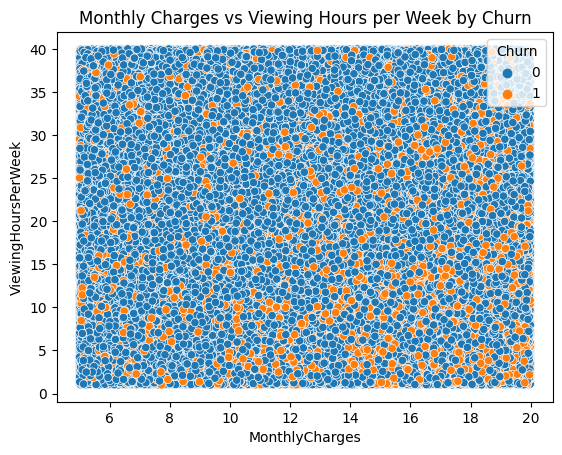

In [23]:
sns.scatterplot(x='MonthlyCharges', y='ViewingHoursPerWeek', hue='Churn', data=df)
plt.title('Monthly Charges vs Viewing Hours per Week by Churn')
plt.show()


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X=df[numerical_features]
X = add_constant(X)  # Add constant for intercept
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


                   Variable        VIF
0                     const  59.596533
1                AccountAge   9.334092
2            MonthlyCharges   4.064473
3              TotalCharges  12.415762
4       ViewingHoursPerWeek   1.000029
5    AverageViewingDuration   1.000020
6  ContentDownloadsPerMonth   1.000026
7                UserRating   1.000019
8    SupportTicketsPerMonth   1.000007
9             WatchlistSize   1.000027


In [25]:
df[numerical_features].dtypes

AccountAge                    int64
MonthlyCharges              float64
TotalCharges                float64
ViewingHoursPerWeek         float64
AverageViewingDuration      float64
ContentDownloadsPerMonth      int64
UserRating                  float64
SupportTicketsPerMonth        int64
WatchlistSize                 int64
dtype: object

In [26]:
correlation_matrix = df[['AccountAge', 'TotalCharges']].corr()
print(correlation_matrix)


              AccountAge  TotalCharges
AccountAge      1.000000      0.820144
TotalCharges    0.820144      1.000000


### Handling Multicollinearity

During our Exploratory Data Analysis (EDA), we examined the **Variance Inflation Factor (VIF)** for the numerical features to check for multicollinearity. 

The VIF values for `AccountAge` and `TotalCharges` were found to be relatively high:

- **AccountAge**: VIF = 9.33
- **TotalCharges**: VIF = 12.42

Since both `AccountAge` and `TotalCharges` are highly correlated with each other, retaining both in the model would introduce **multicollinearity**. Multicollinearity occurs when two or more predictor variables are highly correlated, which can distort the model's coefficients and make the predictions unstable.

#### Decision:
Given the strong positive correlation between `AccountAge` and `TotalCharges`, we have decided to **drop the `TotalCharges` column** from our dataset. This will help reduce multicollinearity and ensure a more stable and interpretable model.

We will proceed with using the `AccountAge` feature for our model as it provides relevant information regarding the customer's account duration.


In [27]:
# Remove 'TotalCharges' from the numerical_features list
numerical_features.remove('TotalCharges')

# Check the updated list
print(numerical_features)


['AccountAge', 'MonthlyCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth', 'WatchlistSize']


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


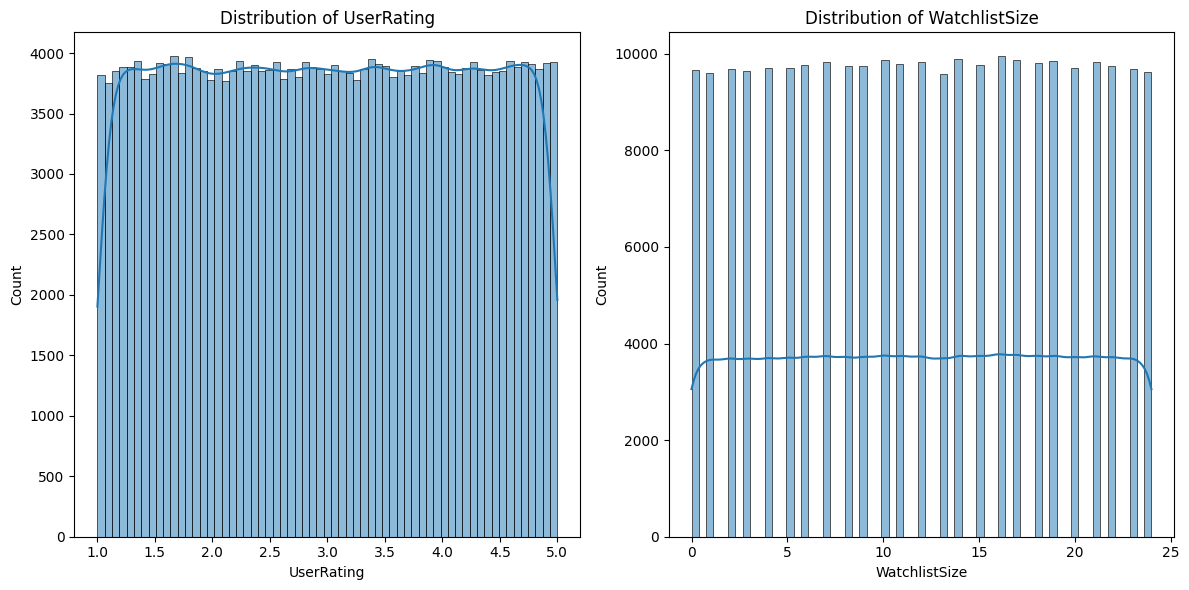

In [28]:
# Plot histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['UserRating'], kde=True)
plt.title('Distribution of UserRating')

plt.subplot(1, 2, 2)
sns.histplot(df['WatchlistSize'], kde=True)
plt.title('Distribution of WatchlistSize')

plt.tight_layout()
plt.show()

               UserRating  WatchlistSize
UserRating       1.000000       0.002567
WatchlistSize    0.002567       1.000000


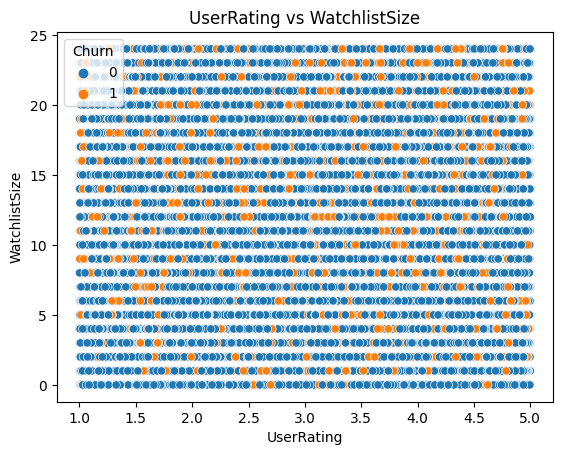

In [29]:
correlation_matrix = df[['UserRating', 'WatchlistSize']].corr()
print(correlation_matrix)

# Scatter plot to visualize the relationship between UserRating and WatchlistSize
sns.scatterplot(x='UserRating', y='WatchlistSize', data=df, hue='Churn')
plt.title('UserRating vs WatchlistSize')
plt.show()


In [30]:
from sklearn.ensemble import RandomForestClassifier

# Assuming you have a pre-processed target variable 'Churn' and features
X = df[numerical_features]
y = df['Churn']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importance
feature_importance = model.feature_importances_
print(f'Feature Importance - UserRating: {feature_importance[0]}, WatchlistSize: {feature_importance[1]}')


Feature Importance - UserRating: 0.14408444055413755, WatchlistSize: 0.14720342890046398


In [31]:
print(numerical_features)
print(feature_importance)

['AccountAge', 'MonthlyCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth', 'WatchlistSize']
[0.14408444 0.14720343 0.15473534 0.16007387 0.10782808 0.13584227
 0.05950021 0.09073237]


UserRating has very high feature importance value, so let's inspect it:

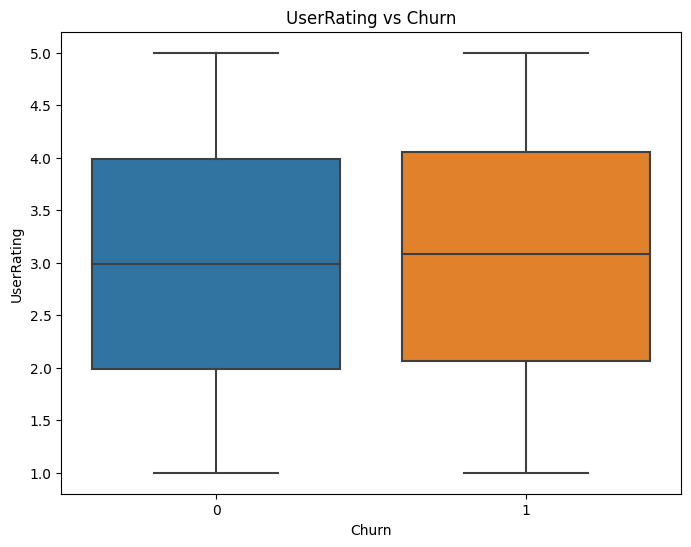

In [32]:
# Boxplot for UserRating vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='UserRating', data=df)
plt.title('UserRating vs Churn')
plt.show()

In [33]:
# Descriptive statistics for UserRating and WatchlistSize based on Churn
print(df.groupby('Churn')[['UserRating', 'WatchlistSize']].describe())


      UserRating                                                              \
           count      mean       std       min       25%       50%       75%   
Churn                                                                          
0       199605.0  2.990688  1.155398  1.000039  1.986598  2.983423  3.989193   
1        44182.0  3.057037  1.153083  1.000007  2.065083  3.084849  4.057920   

                WatchlistSize                                                   
            max         count       mean       std  min  25%   50%   75%   max  
Churn                                                                           
0      4.999982      199605.0  11.944941  7.197050  0.0  6.0  12.0  18.0  24.0  
1      4.999989       44182.0  12.350867  7.165535  0.0  6.0  13.0  19.0  24.0  


In [34]:
from scipy.stats import f_oneway

# ANOVA test between UserRating and Churn
churned_user_ratings = df[df['Churn'] == 1]['UserRating']
non_churned_user_ratings = df[df['Churn'] == 0]['UserRating']

f_stat, p_val = f_oneway(churned_user_ratings, non_churned_user_ratings)
print(f'ANOVA test - F-statistic: {f_stat}, p-value: {p_val}')

ANOVA test - F-statistic: 119.37969132643826, p-value: 8.77789712274367e-28


Based on the ANOVA test, we can reject the null hypothesis (which states that the means of UserRating for churned and non-churned customers are the same) because the p-value is much smaller than the significance level (0.05).
Therefore, we conclude that the mean UserRating is significantly different between churned and non-churned customers. This suggests that UserRating could be an important feature for predicting churn.

In [35]:
categorical_features

['SubscriptionType',
 'PaymentMethod',
 'PaperlessBilling',
 'ContentType',
 'MultiDeviceAccess',
 'DeviceRegistered',
 'GenrePreference',
 'Gender',
 'ParentalControl',
 'SubtitlesEnabled']

In [36]:
for feature in categorical_features:
    print(f'--- {feature} ---')
    print(df[feature].value_counts())
    print("\n")

--- SubscriptionType ---
SubscriptionType
Standard    81920
Basic       81050
Premium     80817
Name: count, dtype: int64


--- PaymentMethod ---
PaymentMethod
Electronic check    61313
Credit card         60924
Bank transfer       60797
Mailed check        60753
Name: count, dtype: int64


--- PaperlessBilling ---
PaperlessBilling
No     121980
Yes    121807
Name: count, dtype: int64


--- ContentType ---
ContentType
Both        81737
TV Shows    81145
Movies      80905
Name: count, dtype: int64


--- MultiDeviceAccess ---
MultiDeviceAccess
No     122035
Yes    121752
Name: count, dtype: int64


--- DeviceRegistered ---
DeviceRegistered
Computer    61147
Tablet      61143
Mobile      60914
TV          60583
Name: count, dtype: int64


--- GenrePreference ---
GenrePreference
Comedy     49060
Fantasy    48955
Drama      48744
Action     48690
Sci-Fi     48338
Name: count, dtype: int64


--- Gender ---
Gender
Female    121930
Male      121857
Name: count, dtype: int64


--- ParentalContr

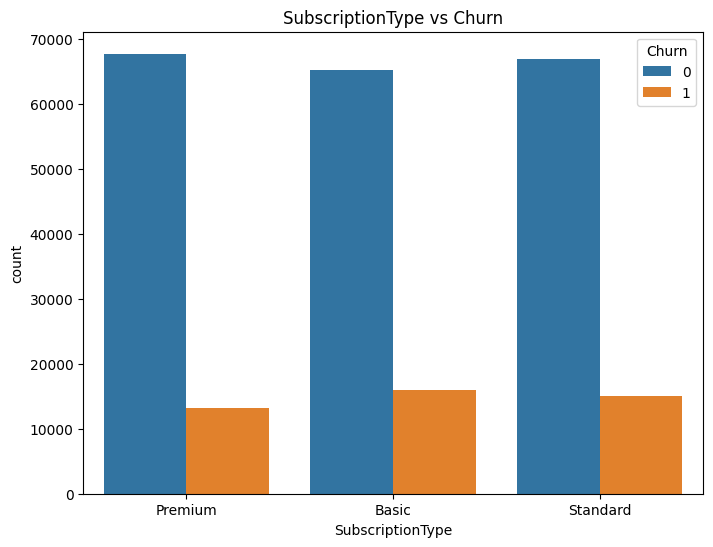

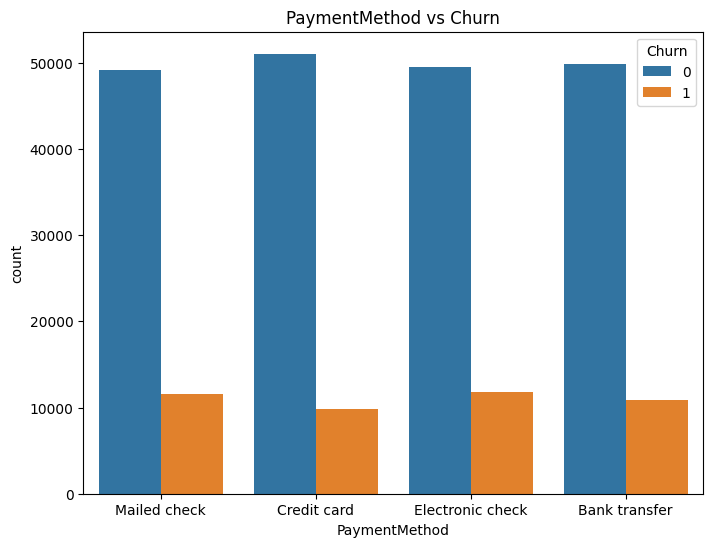

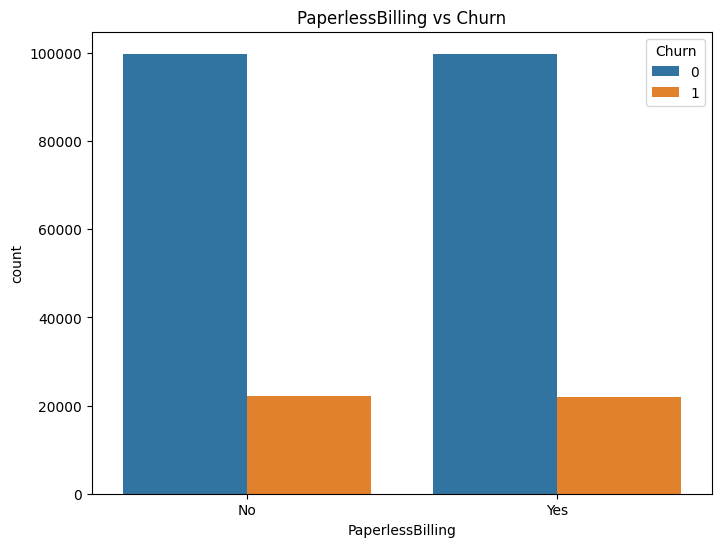

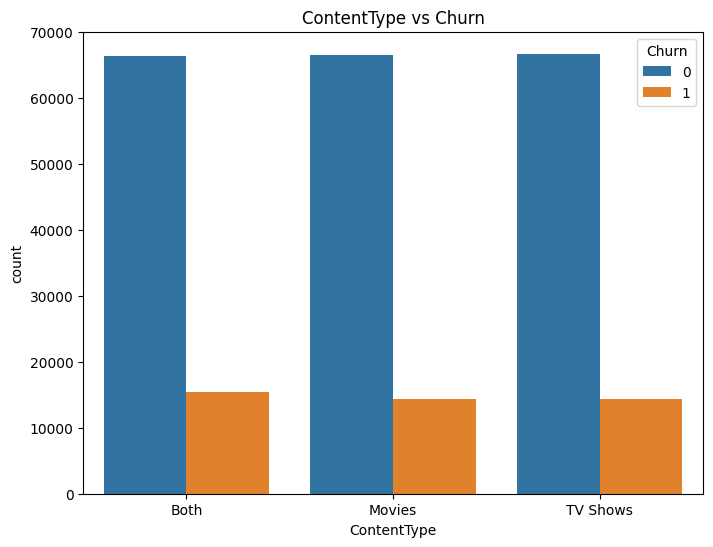

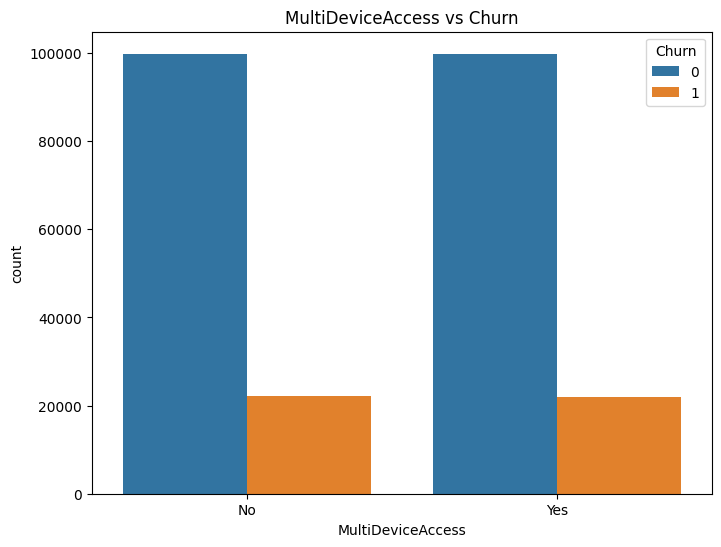

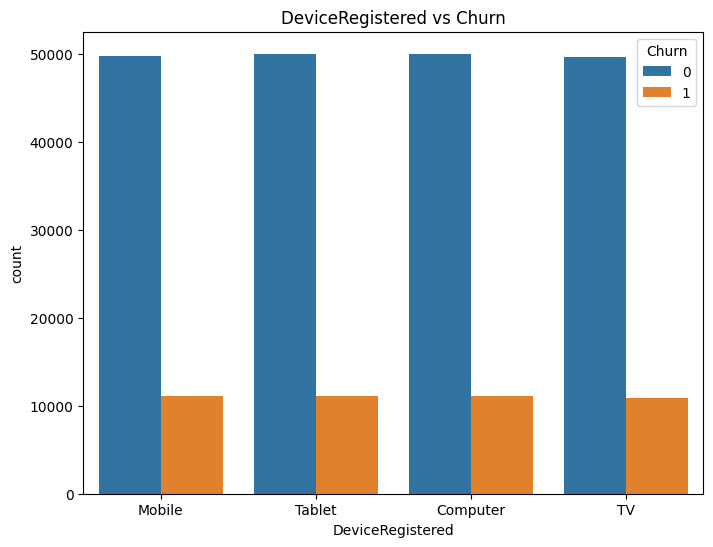

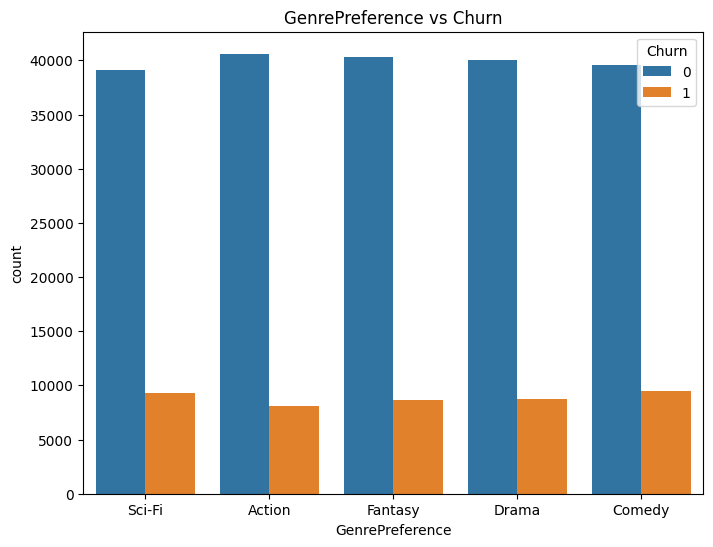

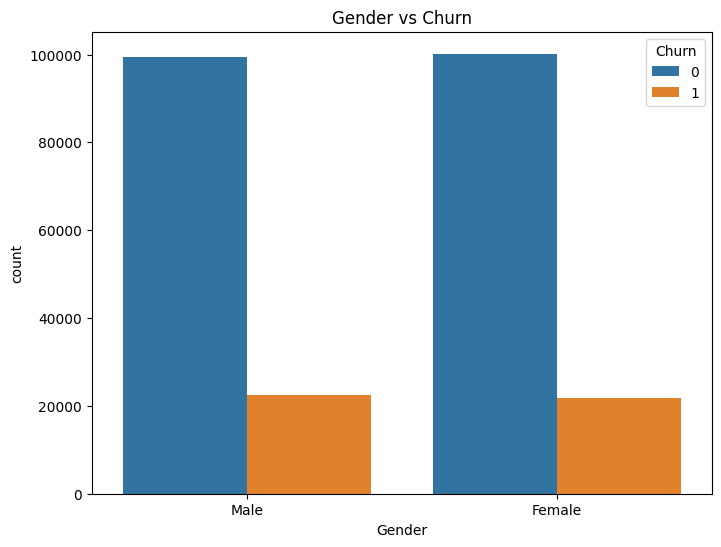

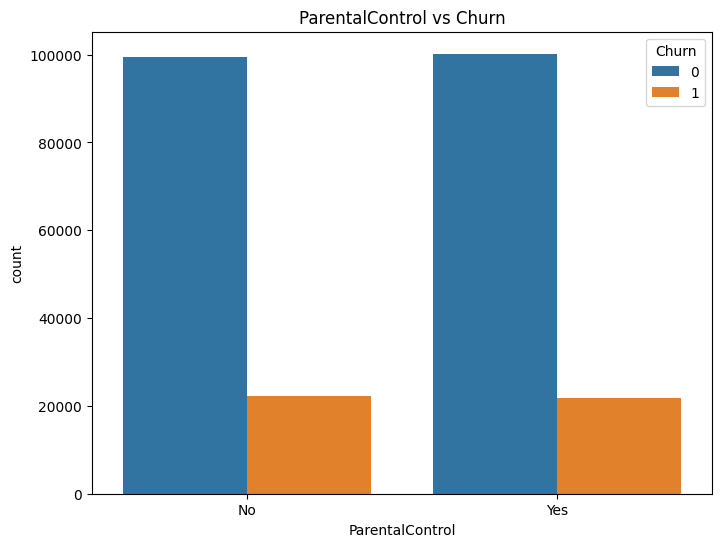

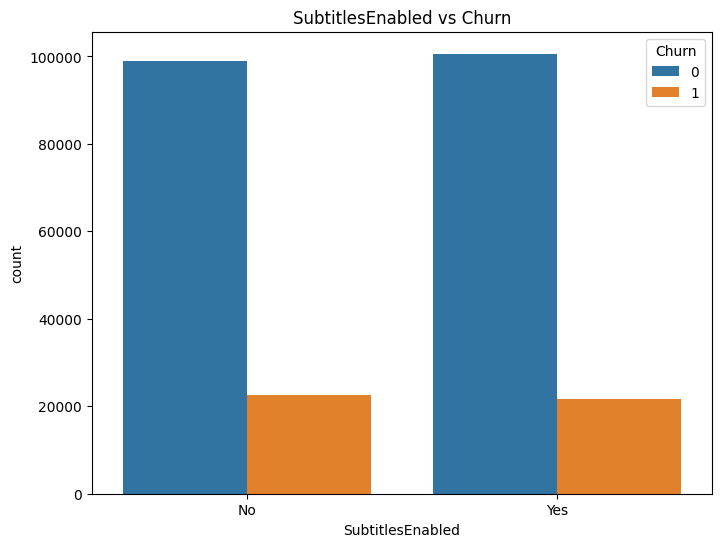

In [37]:
# Count plot for each categorical feature vs Churn
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'{feature} vs Churn')
    plt.show()

In [38]:
# Cross-tabulation between categorical features and Churn (Proportions)
for feature in categorical_features:
    print(f'--- {feature} ---')
    print(pd.crosstab(df[feature], df['Churn'], normalize='index'))  # Proportions
    print("\n")


--- SubscriptionType ---
Churn                    0         1
SubscriptionType                    
Basic             0.803479  0.196521
Premium           0.837225  0.162775
Standard          0.815686  0.184314


--- PaymentMethod ---
Churn                    0         1
PaymentMethod                       
Bank transfer     0.820731  0.179269
Credit card       0.837749  0.162251
Electronic check  0.807529  0.192471
Mailed check      0.809112  0.190888


--- PaperlessBilling ---
Churn                    0         1
PaperlessBilling                    
No                0.818413  0.181587
Yes               0.819124  0.180876


--- ContentType ---
Churn               0         1
ContentType                    
Both         0.811530  0.188470
Movies       0.822236  0.177764
TV Shows     0.822602  0.177398


--- MultiDeviceAccess ---
Churn                     0         1
MultiDeviceAccess                    
No                 0.818273  0.181727
Yes                0.819264  0.180736


--- D

In [39]:
from scipy.stats import chi2_contingency

# Example Chi-Square test on SubscriptionType vs Churn
contingency_table = pd.crosstab(df['SubscriptionType'], df['Churn'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")


Chi-Square Statistic: 318.44935592637506
P-Value: 7.072956347996253e-70


In [40]:
chi_square_results = {}

for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['Churn'])  # Create the contingency table
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    
    chi_square_results[feature] = {'Chi-Square Statistic': chi2_stat, 'p-value': p_val}

# Display results
chi_square_results_df = pd.DataFrame(chi_square_results).T
chi_square_results_df

,Chi-Square Statistic,p-value
SubscriptionType,318.449356,7.072956e-70
PaymentMethod,239.863822,1.018485e-51
PaperlessBilling,0.202776,6.524893e-01
ContentType,43.453997,3.665087e-10
MultiDeviceAccess,0.396155,5.290818e-01
DeviceRegistered,2.839135,4.170980e-01
GenrePreference,169.296653,1.480532e-35
Gender,13.554239,2.317674e-04
ParentalControl,7.429245,6.417227e-03
SubtitlesEnabled,37.251633,1.038280e-09


# Chi-Square Test Results for Categorical Features

We performed the Chi-Square Test for independence between each categorical feature and the target variable **Churn**. Below are the results:

### Significant Features:
1. **SubscriptionType**  
   - **Chi-Square Statistic**: 318.45  
   - **p-value**: 7.07e-70 (Very small, significant)  
   - **Insight**: There is a strong relationship between **SubscriptionType** and **Churn**, suggesting that different subscription types might have different churn rates. This feature is highly important for further analysis.

2. **PaymentMethod**  
   - **Chi-Square Statistic**: 239.86  
   - **p-value**: 1.02e-51 (Very small, significant)  
   - **Insight**: **PaymentMethod** shows a significant relationship with churn. Customers who use certain payment methods might be more likely to churn than others.

3. **ContentType**  
   - **Chi-Square Statistic**: 43.45  
   - **p-value**: 3.67e-10 (Very small, significant)  
   - **Insight**: **ContentType** appears to have a significant relationship with churn. The type of content customers prefer (TV shows, Movies, or Both) could potentially influence their likelihood to churn.

4. **GenrePreference**  
   - **Chi-Square Statistic**: 169.30  
   - **p-value**: 1.48e-35 (Very small, significant)  
   - **Insight**: **GenrePreference** is significantly related to churn, meaning that the genre of content that a customer prefers can influence whether they are likely to churn or not.

5. **Gender**  
   - **Chi-Square Statistic**: 13.55  
   - **p-value**: 2.32e-04 (Small, significant)  
   - **Insight**: There is a significant relationship between **Gender** and churn, suggesting that churn rates may vary between male and female customers.

6. **ParentalControl**  
   - **Chi-Square Statistic**: 7.43  
   - **p-value**: 6.42e-03 (Small, significant)  
   - **Insight**: **ParentalControl** has a small but significant impact on churn. Customers with parental controls enabled are slightly more or less likely to churn.

7. **SubtitlesEnabled**  
   - **Chi-Square Statistic**: 37.25  
   - **p-value**: 1.04e-09 (Very small, significant)  
   - **Insight**: There is a significant relationship between **SubtitlesEnabled** and churn, suggesting that whether a customer has subtitles enabled could be an indicator of their likelihood to churn.

### Not Significant Features:
1. **PaperlessBilling**  
   - **Chi-Square Statistic**: 0.20  
   - **p-value**: 0.652 (Not significant)  
   - **Insight**: **PaperlessBilling** does not show a significant relationship with churn. The presence or absence of paperless billing seems to have little effect on customer churn.

2. **MultiDeviceAccess**  
   - **Chi-Square Statistic**: 0.40  
   - **p-value**: 0.529 (Not significant)  
   - **Insight**: **MultiDeviceAccess** does not appear to have a significant relationship with churn.

3. **DeviceRegistered**  
   - **Chi-Square Statistic**: 2.84  
   - **p-value**: 0.417 (Not significant)  
   - **Insight**: **DeviceRegistered** does not significantly influence churn. The type of device registered does not appear to have a meaningful impact on whether a customer churns.

### Summary:
- **Strong Predictors**: **SubscriptionType**, **PaymentMethod**, **ContentType**, **GenrePreference**, **Gender**, **ParentalControl**, and **SubtitlesEnabled** all show significant relationships with churn. These features might be useful for predicting churn in your model.
- **Weak Predictors**: **PaperlessBilling**, **MultiDeviceAccess**, and **DeviceRegistered** show no significant relationship with churn, so they might not be as useful for prediction.

We can proceed with building a prediction model based on the insights derived from these categorical features. Let me know if you would like to continue with this or explore further!


In [41]:
categorical_features = [
    'SubscriptionType',  # Significant (p-value: 7.07e-70)
    'PaymentMethod',     # Significant (p-value: 1.02e-51)
    'ContentType',       # Significant (p-value: 3.67e-10)
    'GenrePreference',   # Significant (p-value: 1.48e-35)
    'Gender',            # Significant (p-value: 2.32e-04)
    'ParentalControl',   # Significant (p-value: 6.42e-03)
    'SubtitlesEnabled'   # Significant (p-value: 1.04e-09)
]

In [42]:
data = df.copy()

In [43]:
columns_to_drop = [ 'PaperlessBilling', 'MultiDeviceAccess', 'DeviceRegistered','TotalCharges', 'WatchlistSize']  # Add any other irrelevant columns here
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [44]:
from sklearn.preprocessing import OneHotEncoder

# Apply OneHotEncoding using pandas get_dummies
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [45]:
from sklearn.preprocessing import StandardScaler

# Define your numerical features
numerical_features = [
    'AccountAge', 'MonthlyCharges', 'AverageViewingDuration', 
    'ViewingHoursPerWeek', 'ContentDownloadsPerMonth', 'UserRating', 
    'SupportTicketsPerMonth' ]

# Instantiate the scaler
scaler = StandardScaler()

# Apply scaling
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

In [46]:
from sklearn.model_selection import train_test_split

# Separate the target variable 'Churn'
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
lr_model = LogisticRegression(random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression - Accuracy: 0.8241519340415931
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     39921
           1       0.57      0.12      0.19      8837

    accuracy                           0.82     48758
   macro avg       0.70      0.55      0.55     48758
weighted avg       0.79      0.82      0.77     48758



In [48]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree - Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree - Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree - Accuracy: 0.72761393002174
Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83     39921
           1       0.27      0.30      0.29      8837

    accuracy                           0.73     48758
   macro avg       0.56      0.56      0.56     48758
weighted avg       0.74      0.73      0.73     48758



In [49]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest - Accuracy: 0.8215472332745396
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90     39921
           1       0.55      0.08      0.14      8837

    accuracy                           0.82     48758
   macro avg       0.69      0.53      0.52     48758
weighted avg       0.78      0.82      0.76     48758



In [50]:
import xgboost as xgb

# Initialize the XGBoost model
xgb_model_1 = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification for churn (0 or 1)
    eval_metric='logloss',        # Log loss for model evaluation
    use_label_encoder=False,      # Avoid deprecation warning
    scale_pos_weight=1,           # Adjust for class imbalance (you can experiment with this)
    random_state=42
)

# Train the model
xgb_model_1.fit(X_train, y_train)
# Predict on the test set
y_pred = xgb_model_1.predict(X_test)


In [51]:
# Classification report for detailed performance metrics
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.83      0.98      0.90     39921
           1       0.53      0.13      0.20      8837

    accuracy                           0.82     48758
   macro avg       0.68      0.55      0.55     48758
weighted avg       0.78      0.82      0.77     48758



In [52]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'n_estimators': [50, 100, 200],
    'scale_pos_weight': [1, 2, 5]  # Adjust for imbalanced classes
}

# Initialize GridSearchCV with the XGBoost model
grid_search = GridSearchCV(estimator=xgb_model_1, param_grid=param_grid, scoring='recall', cv=3)

# Fit the model with grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model
best_xgb_model = grid_search.best_estimator_


Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 5}


In [53]:
# Predict using the best model
y_pred_tuned = best_xgb_model.predict(X_test)

# Classification report for the tuned model
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.92      0.50      0.65     39921
           1       0.26      0.79      0.39      8837

    accuracy                           0.56     48758
   macro avg       0.59      0.65      0.52     48758
weighted avg       0.80      0.56      0.60     48758

